# グラフ描写
1. jupyterでmatplotlibライブラリを使う際のおまじない(下記)
```python
%matplotlib inline
```

2. matplotlib内からpyplotモジュールをpltとしてインポート
3. numpyをnpとしてインポート　
4. csvファイルのxyという変数に読み込む(1行目はヘッダーなのでスキップする)

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
xy = np.loadtxt("./sensor_data.csv",delimiter=",",skiprows=1)

今回わかりやすくするためにデータを短くし、xとyを分離する

In [2]:
n_rows = 501
x = xy[:n_rows,0]
y = xy[:n_rows,1]

## 基本的な手順

1. 図の準備
2. グラフ領域の追加
3. グラフデータのセット
4. 描写


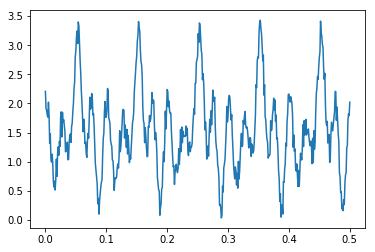

In [3]:
#1. 図の準備
fig = plt.figure()

#2. グラフ領域の追加
ax0 = plt.subplot(1,1,1)
#ax0 = fig.add_subplot(1, 1, 1)でも同等

#3. グラフデータのセット
ax0.plot(x,y)

#4. 描写
plt.show()

## 省略された手順
もっと手軽に描写する場合、下記だけでよい。

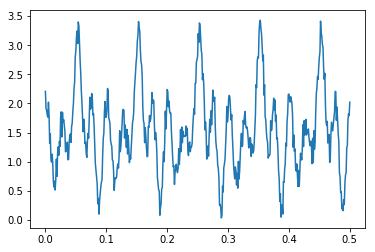

In [4]:
plt.plot(x,y)
plt.show()

## グラフのデコレーション
基本的な手順に加え、グラフの体裁を整える
1. 図の準備
2. グラフ領域の追加
3. グラフデータのセット
4. 体裁を整える
    1. 軸の描写範囲
    2. 軸ラベル
    3. 凡例表示
    4. タイトル
    5. Grid
5. 描写

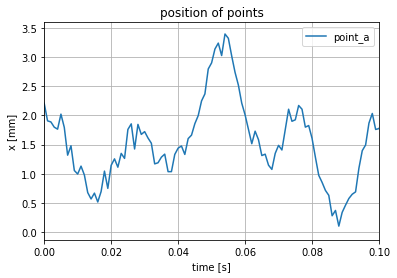

In [5]:
fig = plt.figure()
ax0 = plt.subplot(1,1,1)
ax0.plot(x,y,label="point_a") #プロット時にラベル付けする

#4. 体裁を整える
#A. 軸の描写範囲
ax0.set_xlim(0,0.1)

#B. 軸ラベル
ax0.set_xlabel("time [s]")
ax0.set_ylabel("x [mm]")

#C. 凡例表示
ax0.legend()

#タイトル
ax0.set_title("position of points")

# grid
ax0.grid(True)

plt.show()

## グラフの追加
さらにデータを追加し、グラフも増やす  
plt.subplot関数の引数は、第一引数が行数、第二引数が列数、第三引数がグラフ番号（何番目のグラフ）で指定できる。

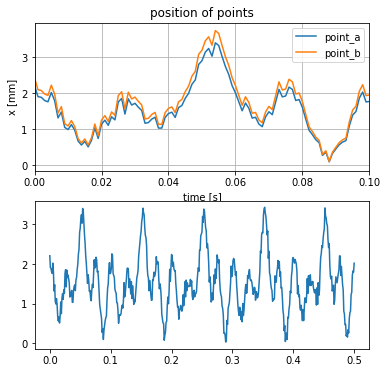

In [6]:
fig = plt.figure(figsize=(6,6))

#ax0,ax1二つのプロット領域を作成
ax0 = plt.subplot(2,1,1)
ax1 = plt.subplot(2,1,2)

#ax0にプロット
ax0.plot(x, y, label="point_a") 
ax0.plot(x, 1.1*y, label="point_b") 

#ax1にプロット
ax1.plot(x,y)

#ax0の体裁を整える
ax0.set_xlim(0,0.1)
ax0.set_xlabel("time [s]")
ax0.set_ylabel("x [mm]")
ax0.legend()
ax0.set_title("position of points")
ax0.grid(True)

plt.show()

## 図の保存
figインスタンスのメソッドsavefigにて保存できる。  
ファイル形式は拡張子から自動判断される


In [7]:
fig.savefig("test.jpeg")

尚、サポートされるファイル形式は、
fig.canvas.get_supported_filetypesメソッドで確認できる

In [8]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## グラフの種類


### 極座標プロット

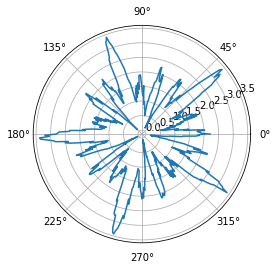

In [9]:
theta = np.linspace(0,2*np.pi,y.size)
plt.subplot(1,1,1,polar=True)
plt.plot(theta,y)

### 散布図

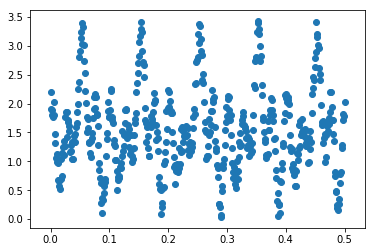

In [10]:
plt.scatter(x,y)

### ヒストグラム
yのデータを10段階で分類.normed=Trueという引数を渡すと正規化される

(array([0.12937254, 0.20581995, 0.35871477, 0.59981815, 0.65862385,
        0.44104275, 0.21758109, 0.09996969, 0.1176114 , 0.1176114 ]),
 array([0.03483066, 0.3742549 , 0.71367913, 1.05310336, 1.3925276 ,
        1.73195183, 2.07137606, 2.4108003 , 2.75022453, 3.08964877,
        3.429073  ]),
 <a list of 10 Patch objects>)

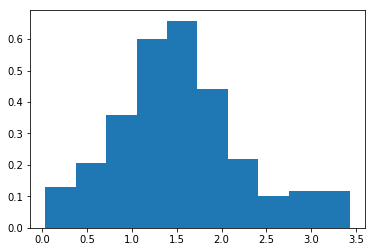

In [11]:
plt.hist(y, bins=10, normed=True)

## 練習
次のグラフを作成する。尚、figsize=(15,10)で作成すること

<img src="./practice.jpeg" >

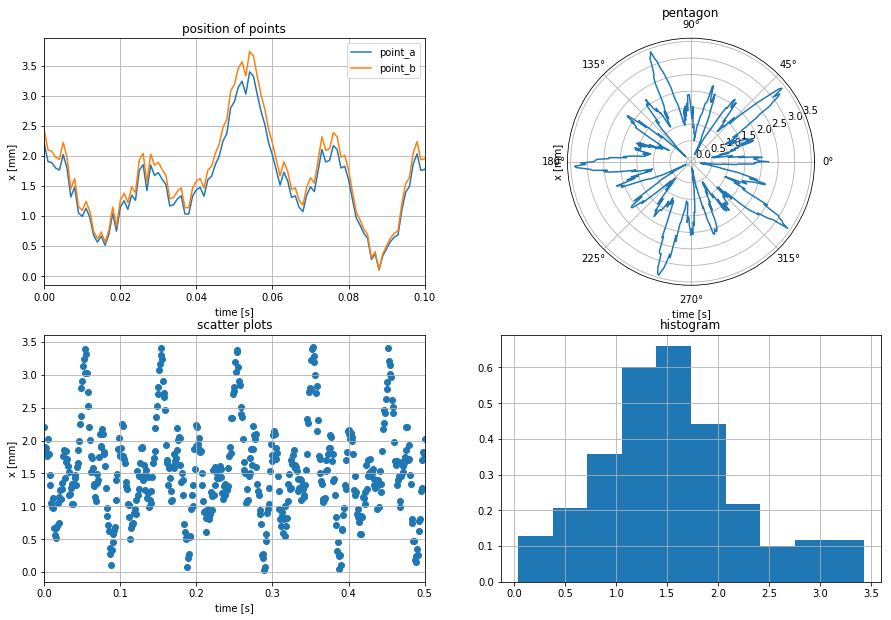

In [12]:
fig = plt.figure(figsize=(15,10))

#ax0,ax1二つのプロット領域を作成
ax0 = plt.subplot(2,2,1)
ax1 = plt.subplot(2,2,2,polar=True)
ax2 = plt.subplot(2,2,3)
ax3 = plt.subplot(2,2,4)

#ax0にプロット
ax0.plot(x, y, label="point_a") 
ax0.plot(x, 1.1*y, label="point_b") 
#ax0の体裁を整える
ax0.set_xlim(0,0.1)
ax0.set_xlabel("time [s]")
ax0.set_ylabel("x [mm]")
ax0.legend()
ax0.set_title("position of points")
ax0.grid(True)


#ax1にプロット
theta = np.linspace(0,2*np.pi,y.size)
ax1.plot(theta,y)
ax1.set_xlabel("time [s]")
ax1.set_ylabel("x [mm]")
ax1.set_title("pentagon", va='bottom')
ax1.grid(True)

#ax2に散布図
ax2.scatter(x,y)
ax2.set_xlim(x.min(), x.max())
ax2.grid(True)
ax2.set_xlabel("time [s]")
ax2.set_ylabel("x [mm]")
ax2.set_title("scatter plots")

#ax3にヒストグラム
ax3.hist(y, bins=10, normed=True)
ax3.grid(True)
ax3.set_title("histogram")

plt.show()

## インタラクティブなプロット
1. JupyterNotebookでインタラクティブプロット.
    下記おまじないを行ってからプロットする
    ```python
    %matplotlib nbagg
    ```
    
2. IPythonで実行.下記おまじないを行ってからプロットする
   ※sensor_data.csvがあるフォルダに移動してipythonを起動すること
   
    ```python
    %matplotlib auto
    ```

以下実施するコード

---

```python
from matplotlib import pyplot as plt
import numpy as np
xy = np.loadtxt("./sensor_data.csv",delimiter=",",skiprows=1)
fig = plt.figure(figsize=(6,6))

#ax0,ax1二つのプロット領域を作成
ax0 = plt.subplot(2,1,1)
ax1 = plt.subplot(2,1,2)

#ax0にプロット
ax0.plot(x, y, label="point_a") 
ax0.plot(x, 1.1*y, label="point_b") 

#ax1にプロット
ax1.plot(x,y)

#ax0の体裁を整える
ax0.set_xlim(0,0.1)
ax0.set_xlabel("time [s]")
ax0.set_ylabel("x [mm]")
ax0.legend()
ax0.set_title("position of points")
ax0.grid(True)

plt.show()
```
---

<IPython.core.display.Javascript object>


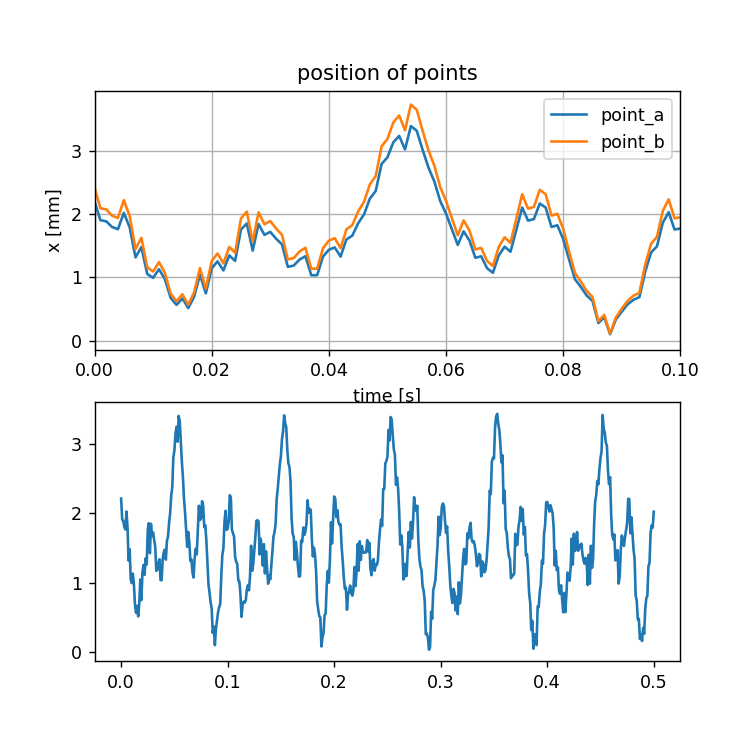

In [14]:
%matplotlib nbagg
from matplotlib import pyplot as plt
import numpy as np
xy = np.loadtxt("./sensor_data.csv",delimiter=",",skiprows=1)
n_rows = 501
x = xy[:n_rows,0]
y = xy[:n_rows,1]

fig = plt.figure(figsize=(6,6))

#ax0,ax1二つのプロット領域を作成
ax0 = plt.subplot(2,1,1)
ax1 = plt.subplot(2,1,2)

#ax0にプロット
ax0.plot(x, y, label="point_a") 
ax0.plot(x, 1.1*y, label="point_b") 

#ax1にプロット
ax1.plot(x,y)

#ax0の体裁を整える
ax0.set_xlim(0,0.1)
ax0.set_xlabel("time [s]")
ax0.set_ylabel("x [mm]")
ax0.legend()
ax0.set_title("position of points")
ax0.grid(True)

plt.show()

---
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img align="right" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><br />
<div align="right"><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">python4engineer</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/TatsuyaKatayama/python4engineer" property="cc:attributionName" rel="cc:attributionURL">TatsuyaKatayama</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>. </div>
